In [68]:
import tensorflow as tf
import numpy as np

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

# Ejemplo Perceptrón con sigmoide (regresión logística)

In [70]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

Declaracion de variables

In [71]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")


Operaciones, grafo

In [72]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [73]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva


Correr programa

In [78]:
sess.run(init)
for i in range(5000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [88]:
#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.34263167]]
[[ 2.62849736]
 [ 2.63038087]]


Cuantificar Error

In [56]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

1.0


Visualizar Barrera de Decisión. Sacar las w del grafo de Tensorflow

In [57]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

Donde vale $X_1$ cero y donde $X_2$ vale cero? $w_0+w_1X_1+w_2X_2 =0$. $X_1=\frac{-w_2X_2-w_0}{w_1}$ y $X_2=\frac{-w_1X_1-w_0}{w_2}$

Buscamos una recta que pasa por $\left(0,\frac{-w_0}{w_2}\right)$ y $\left(\frac{-w_0}{w_1},0\right)$, la pendiente es $\frac{\frac{-w_0}{w_2}-0}{0-\frac{-w_0}{w_1}}=\frac{-w_1}{w_2}$ 
La ordenada $y-y_1=m(x-x_1)$ es $y-\frac{-w_0}{w_2}=\frac{-w_1}{w_2} x$, $y=\frac{-w_1}{w_2} x+\frac{-w_0}{w_2}$


In [58]:
m=((w[0]/w[2]))/((-w[0]/w[1]))
print -w[0]/w[1], -w[0]/w[2], m

1.14784 2.66513 -2.32187


(-5.2, 5.2)

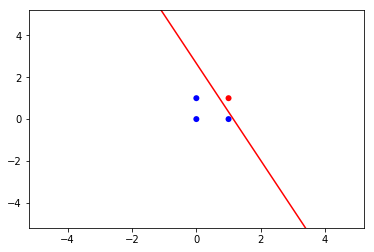

In [59]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [60]:
sess.close()